<a href="https://colab.research.google.com/github/islam-mirajul/Name-Based-Community-Prediction/blob/main/Community-Prediction(Full_Name).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import unicodedata
import nltk
from nltk.tokenize import word_tokenize



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/name-religion/Religion-Prediction-large.csv',error_bad_lines=False)
df

,Name,Religion
0,মোঃ জাকির হোসেন,ইসলাম
1,মোস্তফা কামাল,ইসলাম
2,মারিয়া খানম,ইসলাম
3,আকাশ কেশারী,হিন্দু
4,আনি বাবলু বড়ুয়া,বৌদ্ধ
...,...,...
8225,হোমিউন কাবের,ইসলাম
8226,হোসেন বেপারি,ইসলাম
8227,হ্যান্ডরি জিতু,খ্রিষ্টান
8228,হ্যাপি রিচিল,খ্রিষ্টান


In [ ]:
df['word_count'] = df['Name'].apply(lambda x: len(str(x).split(" ")))
df[['Name','word_count']].head()


,Name,word_count
0,মোঃ জাকির হোসেন,4
1,মোস্তফা কামাল,3
2,মারিয়া খানম,3
3,আকাশ কেশারী,4
4,আনি বাবলু বড়ুয়া,3


In [ ]:
df['char_count'] = df['Name'].str.len() ## this also includes spaces
df[['Name','char_count']].head()

,Name,char_count
0,মোঃ জাকির হোসেন,16
1,মোস্তফা কামাল,14
2,মারিয়া খানম,12
3,আকাশ কেশারী,13
4,আনি বাবলু বড়ুয়া,17


In [ ]:
df['Name'] = df['Name'].str.replace('[^\w\s]','')
df['Name'].head()

0    ম জকর  হসন
1     মসতফ  কমল
2      মরয়  খনম
3     আকশ   কশর
4    আন ববল বডয
Name: Name, dtype: object

In [ ]:
df.isnull().sum()

Name        0
Religion    0
dtype: int64

In [ ]:
df['Religion'].value_counts()

ইসলাম        2118
খ্রিষ্টান    2106
হিন্দু       2014
বৌদ্ধ        1992
Name: Religion, dtype: int64

In [ ]:
df['Religion'].unique()

array(['ইসলাম', 'হিন্দু', 'বৌদ্ধ', 'খ্রিষ্টান'], dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2454 missing from current font.
  font.set_text(s

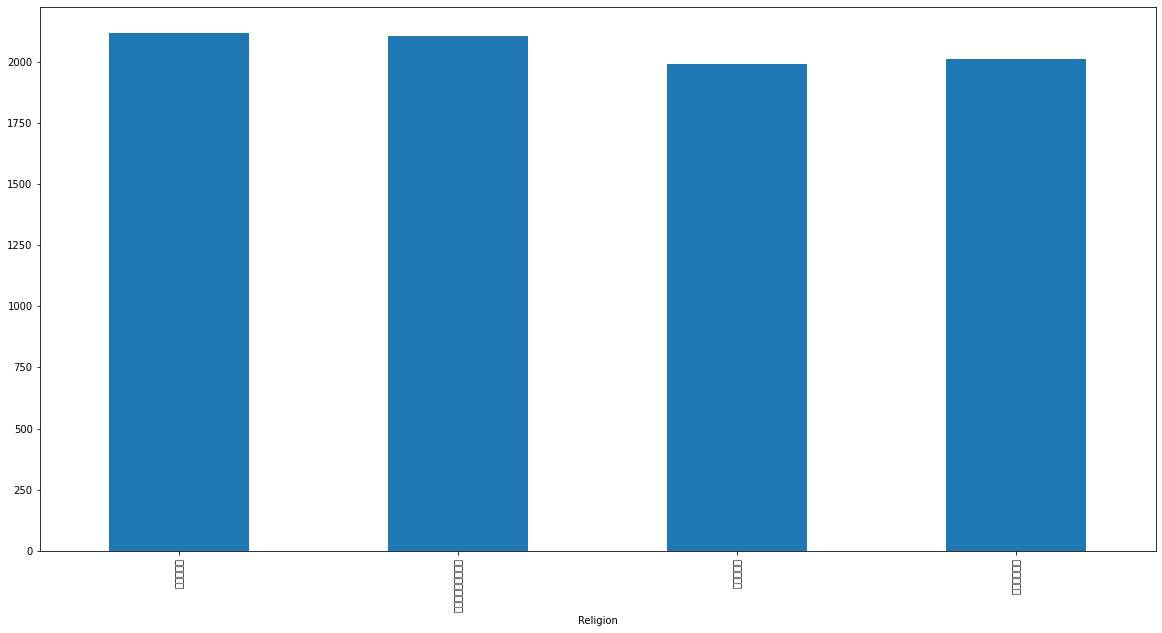

In [ ]:

df.groupby("Religion")['Name'].size().plot(kind='bar',figsize=(20,10))

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Name']  # this time we want to look at the text
y = df['Religion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(6584, 788)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(6584, 788)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(6584, 788)

In [ ]:
 y_test.shape, X_test.shape,X_train.shape,y_train.shape

((1646,), (1646,), (6584,), (6584,))

In [ ]:

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

[[335  90   1  15]
 [ 23 353   6  43]
 [  6  35 324  19]
 [ 18 144  10 224]]


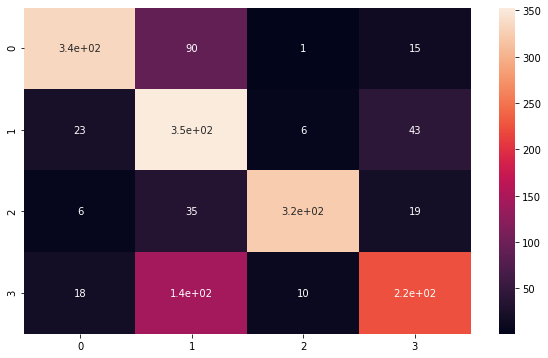

In [ ]:
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )


In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.88      0.76      0.81       441
   খ্রিষ্টান       0.57      0.83      0.67       425
       বৌদ্ধ       0.95      0.84      0.89       384
      হিন্দু       0.74      0.57      0.64       396

    accuracy                           0.75      1646
   macro avg       0.78      0.75      0.76      1646
weighted avg       0.78      0.75      0.76      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7509113001215066


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_tfidf,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

[[290 116  15  20]
 [ 26 337  11  51]
 [ 26  64 254  40]
 [ 23 154  28 191]]


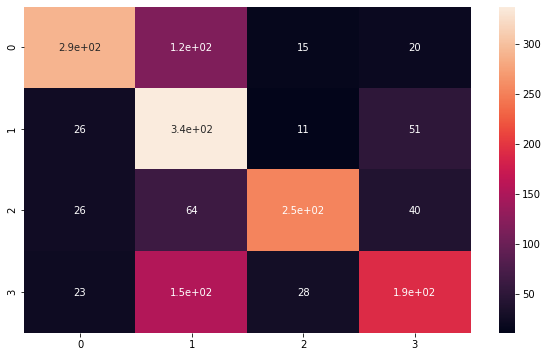

In [ ]:
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.79      0.66      0.72       441
   খ্রিষ্টান       0.50      0.79      0.61       425
       বৌদ্ধ       0.82      0.66      0.73       384
      হিন্দু       0.63      0.48      0.55       396

    accuracy                           0.65      1646
   macro avg       0.69      0.65      0.65      1646
weighted avg       0.69      0.65      0.65      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6512758201701093


In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_tfidf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

[[344  81   1  15]
 [ 14 366   5  40]
 [  6  35 325  18]
 [ 15 131   8 242]]


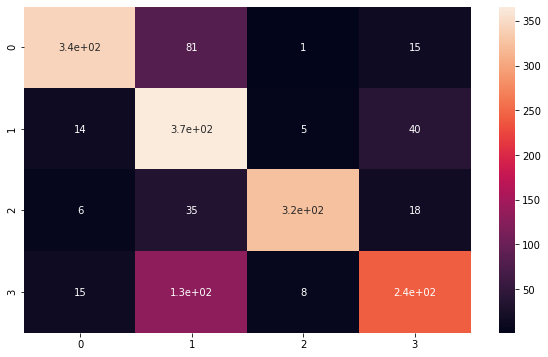

In [ ]:
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.91      0.78      0.84       441
   খ্রিষ্টান       0.60      0.86      0.71       425
       বৌদ্ধ       0.96      0.85      0.90       384
      হিন্দু       0.77      0.61      0.68       396

    accuracy                           0.78      1646
   macro avg       0.81      0.77      0.78      1646
weighted avg       0.81      0.78      0.78      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.775820170109356


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_tfidf,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

[[330  94   1  16]
 [ 22 352   6  45]
 [  6  41 315  22]
 [ 16 148   9 223]]


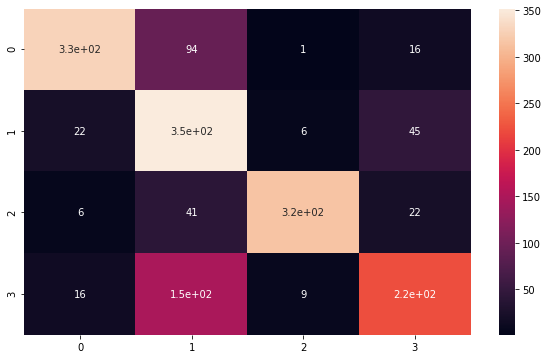

In [ ]:
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.88      0.75      0.81       441
   খ্রিষ্টান       0.55      0.83      0.66       425
       বৌদ্ধ       0.95      0.82      0.88       384
      হিন্দু       0.73      0.56      0.64       396

    accuracy                           0.74      1646
   macro avg       0.78      0.74      0.75      1646
weighted avg       0.78      0.74      0.75      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.741190765492102


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',RandomForestClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

[[347  77   3  14]
 [ 17 368   4  36]
 [  4  30 331  19]
 [ 13 132   9 242]]


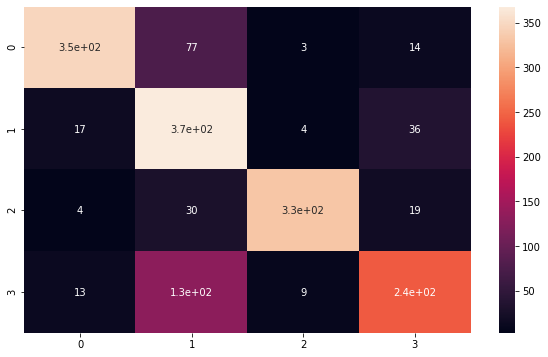

In [ ]:
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.91      0.79      0.84       441
   খ্রিষ্টান       0.61      0.87      0.71       425
       বৌদ্ধ       0.95      0.86      0.91       384
      হিন্দু       0.78      0.61      0.68       396

    accuracy                           0.78      1646
   macro avg       0.81      0.78      0.79      1646
weighted avg       0.81      0.78      0.79      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7825030376670717


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',DecisionTreeClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
               

[[347  77   3  14]
 [ 13 370   6  36]
 [  4  32 331  17]
 [ 13 132  11 240]]


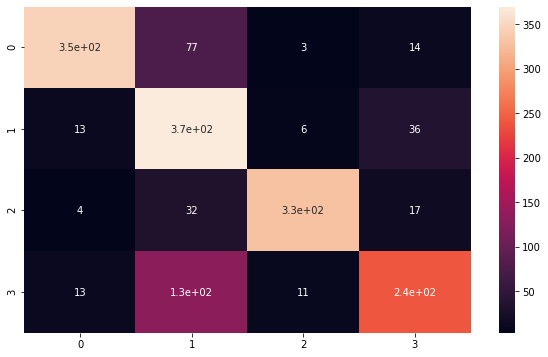

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.92      0.79      0.85       441
   খ্রিষ্টান       0.61      0.87      0.71       425
       বৌদ্ধ       0.94      0.86      0.90       384
      হিন্দু       0.78      0.61      0.68       396

    accuracy                           0.78      1646
   macro avg       0.81      0.78      0.79      1646
weighted avg       0.81      0.78      0.79      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7825030376670717


In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_tfidf,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',SGDClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

[[336  93   2  10]
 [ 21 351  10  43]
 [  4  38 325  17]
 [ 21 135  15 225]]


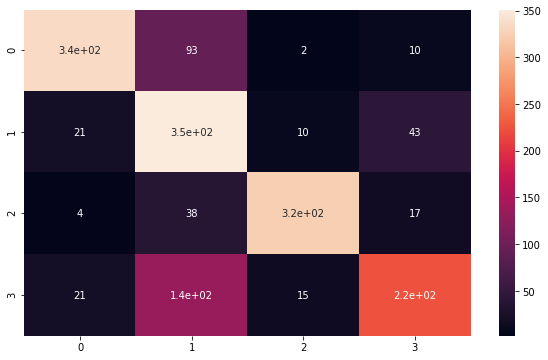

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.88      0.76      0.82       441
   খ্রিষ্টান       0.57      0.83      0.67       425
       বৌদ্ধ       0.92      0.85      0.88       384
      হিন্দু       0.76      0.57      0.65       396

    accuracy                           0.75      1646
   macro avg       0.78      0.75      0.76      1646
weighted avg       0.78      0.75      0.76      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7515188335358445


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',MultinomialNB()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

[[333  91   5  12]
 [ 23 351  13  38]
 [  8  37 320  19]
 [ 24 146  21 205]]


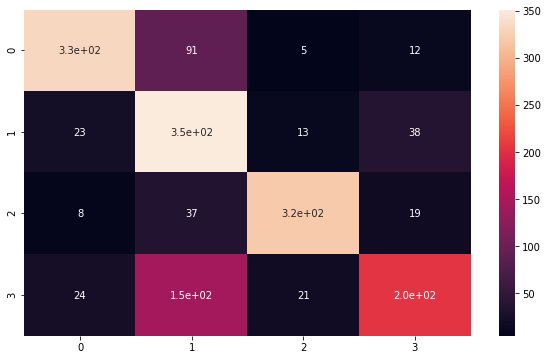

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.86      0.76      0.80       441
   খ্রিষ্টান       0.56      0.83      0.67       425
       বৌদ্ধ       0.89      0.83      0.86       384
      হিন্দু       0.75      0.52      0.61       396

    accuracy                           0.73      1646
   macro avg       0.76      0.73      0.74      1646
weighted avg       0.76      0.73      0.74      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7345078979343864
